# Sources

Here we summarise the catalogue source components and their underlying physical models. These source models can be categorised into two groups: (1) phenomenological source models and (2) physical source models. The first group contains sources designed to replicate a particular property of the light they produce, for example, a source of perfect Fock states or a coherent laser pulse. The second group contains sources based on master equations that represents a particular quantum system. This category includes emitter-cavity systems and quantum dot models.

__Phenomenologial source models__

|          Name           |     Method     | Description                                                                                              | Modes |
|:-----------------------:|:--------------:|----------------------------------------------------------------------------------------------------------|:-----:|
|       Fock source       |     `fock`     | A source of (shaped) photonic states in the Fock basis                                                   |   1   |
|   Shaped laser pulse    | `shaped_laser` | A shaped coherent pulse with finite quantum fluctuations                                                 |   1   |
|  Distinguishable noise  |   `perceval`   | A noisy single photon source characterised by brightness, single-photon purity, and indistinguishability |   1   |

The above table summarises the current catalogue phenomenological source types, their associated Source class method, a brief description, and the number of emission modes they couple to.

__Physical source models__

|          Name           |     Method     |           Energy-Level Diagram           | Modes |
|:-----------------------:|:--------------:|:----------------------------------------:|-------|
|    Two-level emitter    |  `two_level`   | ![](../_static/img/two-level-system.png) | 1     |
| Cavity-enhanced emitter |   `purcell`    |     ![](../_static/img/purcell.png)      | 1(2)  |
|  Quantum dot, exciton   |   `exciton`    |     ![](../_static/img/exciton.png)      | 2     |
| Quantum dot, biexciton  |  `biexction`   |    ![](../_static/img/biexciton.png)     | 4     |
|   Quantum dot, trion    |    `trion`     |      ![](../_static/img/trion.png)       | 2     |

Above is a table that summarises the current catalogue physical source types, their associated Source class method, an energy-level diagram to roughly illustrate their behaviour, and the number of active (masked) emission modes they couple to.

The energy-level diagrams depict the number of basis states each source is constructed from. Some sources may have their state space truncated for numerical simulation (indicated by the vertical dots).

The straight vertical upward-pointing arrows indicate transitions that can be coherently driven by a classical driving Hamiltonian, specified by giving a Pulse object using the 'pulse' keyword when instantiating with the Source class.

Wavy downward-pointing arrows indicate transitions that can be analysed using methods of the Source class, or coupled to the modes of a processor. Each mode is numbered, indicating the order in which each transition of the source will couple to the modes of a processor. A permutation circuit can be applied to alter this ordering.

Transition numbers in parentheses indicate that the mode is masked by default, so that the source behaves as if that transition was not being collected by the processor.

In the following sections, each source type is introduced in more detail.

In [1]:
from zpgenerator import *

## Fock

The Fock source is modelled as a quantum harmonic oscillator. The initial state of the oscillator leaks into the environment with a decay rate that may vary in time to shape the light. When instantiated, the oscillator energy levels are truncated at the highest Fock state in the provided state. If a shape is provided, this shape is fixed even if a parameterised object gave the shape (such as a Pulse object).

### The master equation

The Fock source is governed by a master equation with a Liouvillian of the form

$$
\mathcal{L}(t) = -i\mathcal{H} + \kappa(t)\mathcal{D}_{\hat{a}} + \gamma^\star\mathcal{D}_{\hat{a}^\dagger\hat{a}}
$$
where $\mathcal{H}\hat{\rho} = [\Delta_a\hat{a}^\dagger\hat{a}, \hat{\rho}]$ and $\Delta_a$ is the detuning of the harmonic oscillator from the global reference, $\kappa(t)$ is a time-dependent decay rate, and $\gamma^\star$ is a pure dephasing rate.

The parameters of this model are:

\begin{tabular}{c|l|l}
\text{Symbol}&\text{Description}&\text{ZPG Parameter}\\\hline
$\gamma^\star & \text{Pure dephasing rate}& \text{`dephasing'}\\
$\Delta_a & \text{Resonance} & \text{`resonance'}\\
\end{tabular}

### Examples

The default parameters include the model above plus the start of the emission 'delay' and the source 'efficiency'. The 'decay' parameter is only relevant if a shape is not specified, as the source defaults to exponential decay.

In [48]:
source = Source.fock(1)
source.default_parameters

{'resonance': 0.0,
 'dephasing': 0.0,
 'delay': 0.0,
 'decay': 1.0,
 'efficiency': 1}

The shape of the emitted photonic wavepacket can be specified with the 'shape' keyword.

Number  | Probability
0       | 0.00000
1       | 0.00000
2       | 1.00000
3       | 0.00000
4       | 0.00000
5       | 0.00000
6       | 0.00000



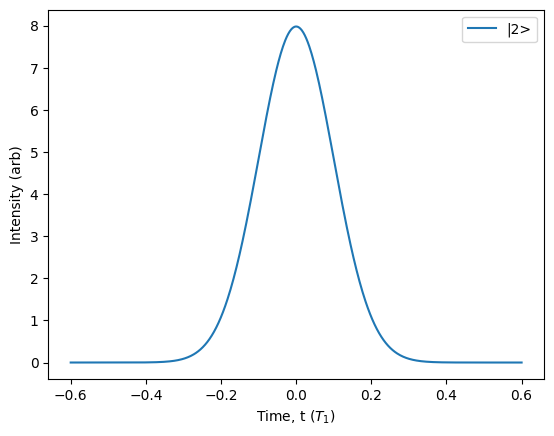

In [49]:
source = Source.fock(2, shape=Pulse.gaussian())
source.photon_statistics().display()
source.plot_lifetime(label='|2>').show()

The state of light can either be an integer indicating a single Fock state, or a QuTiP Qobj. Shapes can also be customised using the Pulse class. Note that arguments will not be effective in this case, the shape is fixed when instantiating the Fock source.

Number  | Probability
0       | 0.25000
1       | 0.25000
2       | 0.25000
3       | 0.24999
4       | 0.00000



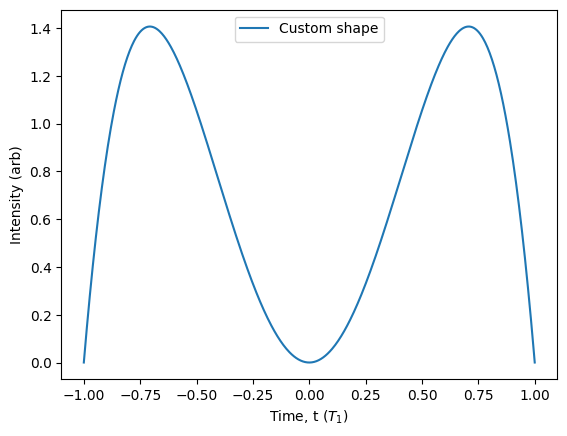

In [50]:
from qutip import fock
source = Source.fock(state=(fock(4, 0) + fock(4, 1) + fock(4, 2) + fock(4, 3)) / 2,
                     shape=Pulse.custom(lambda t, args: t**2 - t**4, gate=[-1, 1]))
source.photon_statistics().display()
source.plot_lifetime(label='Custom shape').show()

## Shaped laser

Almost identical to the Fock state, the shaped laser is a quantum harmonic oscillator with a potentially time-varying decay rate. The difference is that it includes a classical coherent component on top of these dissipative quantum fluctuations. The initial state of these quantum fluctuations is the vacuum state. However, interference of the shaped laser source with other sources of light, followed by photon-counting detection, can project these quantum fluctuations onto a non-vacuum state. This approach allows for simulating classical states of light containing many photons, while still capturing quantum effects due to interference with weak quantum states of light.

### Examples

Note the addition of the amplitude parameter, governing the amplitude of the classical coherent state.

In [51]:
source = Source.shaped_laser()
source.default_parameters

{'resonance': 0.0,
 'dephasing': 0.0,
 'delay': 0,
 'decay': 1,
 'amplitude': 0,
 'efficiency': 1}

By specifying a non-zero amplitude, we can see that the photon statistics are classical. By default, the shape of the laser pulse is exponentially decaying in time.

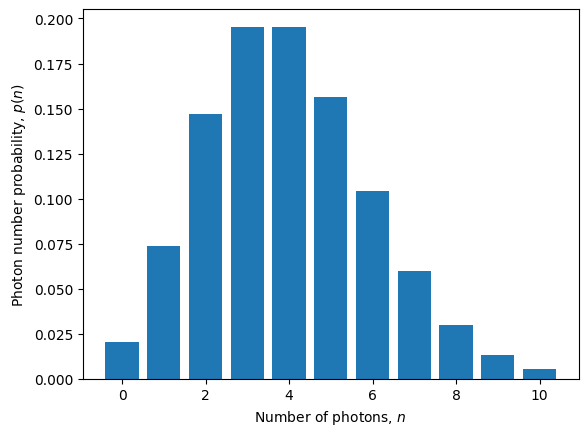

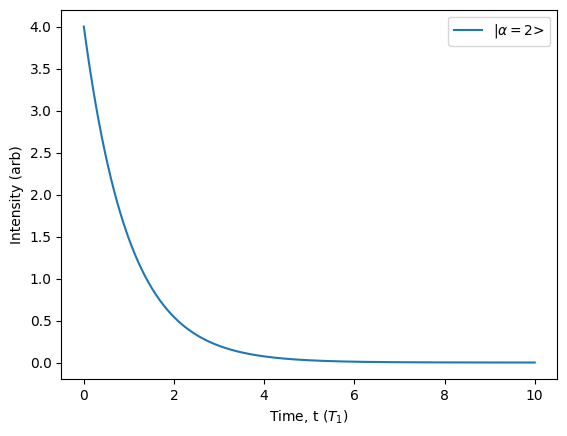

In [52]:
source = Source.shaped_laser(parameters={'amplitude': 2})
source.photon_statistics().plot().show()
source.plot_lifetime(label='|$\\alpha=2$>').show()

## Distinguishable noise

Coming soon!

## Two-level

The two-level emitter is the text-book example of a quantum emitter. It is composed of a single ground state $| g\rangle$ and a single excited state $| e\rangle$. The emitter may be driven by a laser pulse that interacts through a semi-classical dipole driving Hamiltonian under the rotating-wave approximation. For more information about the driven-dissipative two-level system, please see [[H. Breuer, and F. Petruccione. Oxford University Press, Great Clarendon Street, (2002)](https://books.google.fr/books/about/The_Theory_of_Open_Quantum_Systems.html?id=0Yx5VzaMYm8C&redir_esc=y)] and also [[T. Grange, et al., Phys. Rev. Lett. 114, 193601 (2015)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.79.053838)].

### The master equation

We begin by writing the Hamiltonian $\hat{H}$ of a driven two-level emitter:
$$
\hat{H}(t) = \Delta \hat{\sigma}^\dagger\hat{\sigma} + \frac{1}{2}\left(\Omega(t)\hat{\sigma} + \Omega^*(t)\hat{\sigma}^\dagger\right)
$$
where $\Delta_\sigma$ is the detuning of the emitter from the global reference, $\Omega(t)$ is the time-dependent (complex) Rabi frequency, and $\sigma=|g\rangle\langle e|$ is the lowering operator.

In addition, we include a dissipative decay rate and a phenomenological dephasing rate. This gives a Markovian master equation of the form $\dot{\rho}(t)=\mathcal{L}(t)\hat{\rho}(t)$ where the Liouvillian $\mathcal{L}(t)$ is defined by

$$
\mathcal{L}(t) = -i\mathcal{H}(t) + \gamma\mathcal{D}_{\hat{\sigma}} + \gamma^\star\mathcal{D}_{\hat{\sigma}^\dagger\hat{\sigma}}
$$
where $\mathcal{H}(t)\hat{\rho} = [\hat{H}(t), \hat{\rho}]$ and $\mathcal{D}_{\hat{A}}\hat{\rho} = \hat{A}\hat{\rho}\hat{A}^\dagger - \hat{A}^\dagger\hat{A}\hat{\rho}/2 - \hat{\rho}\hat{A}^\dagger\hat{A}/2$.

The parameters of this model are:

\begin{tabular}{c|l|l}
\text{Symbol}&\text{Description}&\text{ZPG Parameter}\\\hline
$\gamma$ & \text{Spontaneous emission rate} & \text{`decay'}\\
$\gamma^\star & \text{Pure dephasing rate}& \text{`dephasing'}\\
$\Delta & \text{Resonance} & \text{`resonance'}\\
$\Omega(t) & \text{Excitation Rabi frequency} & \text{keyword: pulse}  \\
\end{tabular}

The excitation Rabi frequency $\Omega(t)$ is defined by the pulse supplied, which could be a Dirac, Gaussian, square, or a custom shape. For catalogue pulse shapes, the variable $\delta$ is controlled by the 'detuning' parameter.

### Example

The Emitter object underlying the Source object displays the model parameters.

In [53]:
emitter = Emitter.two_level()
emitter.parameters

['decay', 'dephasing', 'resonance']

Instantiating the corresponding source object includes pulse parameters as well as a source efficiency. These parameters have default values.

In [54]:
source = Source.two_level(pulse=Pulse.square())
source.default_parameters

{'resonance': 0.0,
 'decay': 1.0,
 'dephasing': 0.0,
 'width': 0.1,
 'area': 3.141592653589793,
 'phase': 0,
 'delay': 0,
 'efficiency': 1}

Source characteristics can then be evaluated directly specifying new parameters as desired.

In [55]:
source.photon_statistics(parameters={'resonance': 0.1, 'decay': 10})

{(0,): 0.019922779049259987, (1,): 0.8876029520166906, (2,): 0.09100562979141723, (3,): 0.0014606429339787176, (4,): 7.996208653349387e-06}

## Purcell

The theory of cavity QED is very broad and so here we will summarize some of the key results to help introduce the Purcell source type. In particular, we focus on the perspective of dissipative cavity QED using the open quantum systems approach demonstrated in [[H. Breuer, and F. Petruccione. Oxford University Press, Great Clarendon Street, (2002)](https://books.google.fr/books/about/The_Theory_of_Open_Quantum_Systems.html?id=0Yx5VzaMYm8C&redir_esc=y)].

### The master equation

We begin by writing a Markovian master equation of the form $\dot{\rho}(t)=\mathcal{L}(t)\hat{\rho}(t)$ of a two-level emitter coupled with potential pure dephasing coupled to a dissipative cavity mode. For this system, the Liouvillian $\mathcal{L}(t)$ is defined by

$$
\mathcal{L}(t) = -i\mathcal{H}(t) + \gamma\mathcal{D}_{\hat{\sigma}} + \gamma^\star\mathcal{D}_{\hat{\sigma}^\dagger\hat{\sigma}} + \kappa\mathcal{D}_{\hat{a}}
$$

where $\mathcal{H}(t)\hat{\rho} = [\hat{H}(t), \hat{\rho}]$ and $\mathcal{D}_{\hat{A}}\hat{\rho} = \hat{A}\hat{\rho}\hat{A}^\dagger - \hat{A}^\dagger\hat{A}\hat{\rho}/2 - \hat{\rho}\hat{A}^\dagger\hat{A}/2$. The Hamiltonian is defined by

$$
\hat{H}(t) = \Delta_\sigma\hat{\sigma}^\dagger\hat{\sigma} + \Delta_a\hat{a}^\dagger\hat{a} + \frac{1}{2}\left(\Omega(t)\hat{\sigma}+\Omega^*(t)\hat{\sigma}^\dagger\right) + g\left(\hat{\sigma}\hat{a}^\dagger + \hat{\sigma}^\dagger\hat{a}\right).
$$

The parameters of this model are:

\begin{tabular}{c|l|l}
\text{Symbol}&\text{Description}&\text{ZPG Parameter}\\\hline
$\gamma$ & \text{Emitter spontaneous emission rate} & \text{`emitter} \backslash \text{decay'}\\
$\gamma^\star & \text{Emitter pure dephasing rate}& \text{`emitter} \backslash \text{dephasing'}\\
$\kappa &\text{Cavity decay rate} & \text{`cavity} \backslash \text{decay'}\\
$\Delta_\sigma & \text{Emitter resonance} & \text{`emitter} \backslash \text{resonance'}\\
$\Delta_a & \text{Cavity resonance} & \text{`cavity} \backslash \text{resonance'}\\
$\Omega(t) & \text{Emitter excitation Rabi frequency} & \text{NA}\\
$g & \text{Emitter-cavity coupling rate} & \text{`coupling'}\\\\
\end{tabular}

The excitation Rabi frequency $\Omega(t)$ is defined by the pulse supplied, which could be a Dirac, Gaussian, square, or a custom shape.

### The Purcell factor

The complete master equation introduced in the previous section is implemented in the ZPG package as the PurcellEmitter class to provide numerical solutions. However, it can be solved analytically in some scenarios. In particular, let's consider the case where $\Omega(t)$ is a Dirac function so that the system is prepared in the emitter excited state at $t=0$, followed by evolution with $\Omega(t)=0$. In this scenario, the characteristics of the source are entirely governed by the dissipative-coherent dynamics between the emitter and the cavity.

Following the methods of [[A. Auffeves, et al., Physical Review A 79, 053838 (2009)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.79.053838)], [[T. Grange, et al., Phys. Rev. Lett. 114, 193601 (2015)](https://journals.aps.org/pra/abstract/10.1103/PhysRevA.79.053838)], we can make the assumption that $\kappa$ is large compared to $g$ so that any photons collected by the cavity are almost immediately released into the environment. This criteron, namely when $\kappa < 2g$, is known as the weak coupling regime. In the deep weak coupling regime, the probability of finding more than one photon in the cavity mode is negligible, and the probability of find a single photon in the cavity mode is proportional to the probability that the emitter is excited. These conditions allow us to adiabatically eliminate the cavity mode from the master equation to recover an effective two-level emitter with modified parameters. In particular, the effective decay rate of the cavity-enhanced emitter becomes $\gamma + R$ where

$$
R = \frac{4g^2(\kappa + \gamma + \gamma^\star)}{(\kappa + \gamma + \gamma^\star)^2 + 4\Delta^2}\\
$$
is the effective rate of emission via the cavity mode and $\Delta = \Delta_\sigma - \Delta_a$ is the emitter-cavity detuning. Importantly, this additional decay channel has an effective rate $R$ that depends crucially on the parameters $g$, $\gamma$, and $\kappa$. It reaches a maximum value when $\Delta=\gamma^\star=0$ of $4g^2/(\kappa+\gamma)$. In addition, in most cases we can have $\kappa\gg\gamma+\gamma^\star$, which implies an effective rate of

$$
R_\text{p} = \frac{4g^2}{\kappa}.
$$
This is the Purcell rate. The ratio of decay via the cavity and the bare spontaneous emission rate $\gamma$ thus defines the canonical Purcell factor
$$
F_\text{p} = \frac{R_\text{p}}{\gamma} = \frac{4g^2}{\kappa\gamma}.
$$
This factor is very commonly used to predict how an emitter-cavity system will behave. However, this form of the Purcell factor as derived from dissipative cavity QED is less common than the classic expression involving the cavity mode volume $V$ and quality factor $Q$. To reach this expression, we must substitute the microscopic definition for our parameters. For $g$, we have
$$
g = d\sqrt{\frac{\omega_a}{2n^2\varepsilon_0\hbar V}},
$$
where $d$ is the emitter dipole magnitude, $\omega_a$ is the cavity frequency, $n$ is the cavity-emitter effective index of refraction, $\varepsilon_0$ is the vacuum permitivity, and $\hbar$ is Planck's constant. For $\kappa$ we have $\kappa = \frac{\omega_a}{Q}$ and from Fermi's goldren rule, $\gamma$ is given by
$$
\gamma = \frac{n\omega_\sigma^3d^2}{3\pi\varepsilon_0\hbar c^3},
$$
where $\omega_\sigma$ is the emitter frequency and $c$ is the speed of light in vacuum. Substituting these three expressions into $F_\text{p}$, while noting that $\omega_a=\omega_\sigma$ and $\lambda = 2\pi c/\omega_a$ is the emitter-cavity emission wavelength in free space, we have
$$
F_\text{p} = \frac{3}{4\pi^2}\left(\frac{\lambda}{n}\right)^3\left(\frac{Q}{V}\right),
$$
which is the classic expression for the cavity Purcell factor, and it is independent of any emitter properties.

### Keywords

The PurcellSource is unlike other catalogue components because the timescale can be heavily modified by the Purcell enhancement. In sources such as two_level(), exciton(), biexciton(), trion(), the timescale is set by the natural spontaneous emission rate of the emitter, which is usually set to 1 to give a reference for the units of other parameters. By default, this is the same for the Purcell source, but the actual source lifetime is no longer dictated by the spontanoues emission rate. It is therefore much more natural to tie the timescale of a purcell() source to the Purcell-enhanced emission timescale, which is much faster than the natural one. For this reason, the Source.purcell() class method has some keyword arguments that allow the user to easily fix the timescale and cavity regime parameters, without having to specify the underlying physical parameters of the emitter and cavity directly.

The three keyword arguments are:
'purcell_factor'
'regime'
'timescale'

The 'purcell_factor' keyword fixes the _canonical_ Purcell factor of the source, as defined by:
$$
\text{`purcell_factor'} = \frac{4g^2}{\kappa\gamma}.
$$

This factor will impact many attributes of the source, from brightness to indistinguishability. However, as discussed in the theory background, there are different regimes of cavity-emitter interaction and the attributes can vary substantially even for a fixed Purcell factor. Notably, we can fix the regime using the 'regime' keyword, which is defined by:
$$
\text{`regime'} = \frac{2g}{\kappa}.
$$

If the 'regime' is set smaller than 1, it implies a weak-coupling regime. Above 1 implies a strong-coupling regime where a vacuum Rabi splitting will occur.

The last keyword is the 'timescale'. This fixes the units of the source relative to the effective (possibly enhanced) decay rate of the source. It is defined by:
$$
\text{`timescale'} = \frac{1}{\text{`purcell_factor'}\times\gamma}.
$$

In other words, this is the source lifetime expected in the Purcell regime, where the decay rate of the emitter-cavity system is fully dictated by the canonical Purcell factor. Note that, if we are not far into the weak-coupling regime, or if the system is detuned, the specified timescale may not reflect the effective decay rate of the system. In those cases, it is best to adjust the timescale accordingly or set the physical parameters directly.

With these three parameters, the source can determine $\gamma$, $\kappa$, and $g$ uniquely, and thus we can avoid setting them manually. However, if any of these three keywords are specified when creating the PurcellSource object, the source will always overwrite values of $\gamma$, $\kappa$, and $g$. These keyword parameters are very useful if we wish to explore the behaviour in different cavity regimes, rather than model a specific physical source.

## Exciton

Coming soon!

## Biexciton

Coming soon!

## Trion

Coming soon!